In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
heart = pd.read_csv("heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
#mencari missing value
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#melakukan encoding
heart_encoded = pd.get_dummies(heart, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
heart_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


<Axes: >

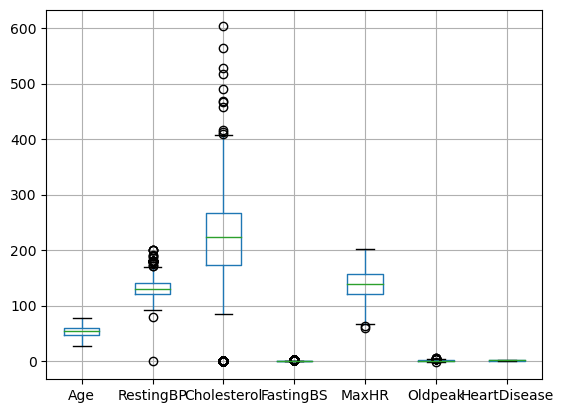

In [8]:
heart.boxplot()

/var/folders/np/1nrkwxjn0wz7wg3d0_ntkz6m0000gn/T/ipykernel_22901/4196373546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heart.corr()


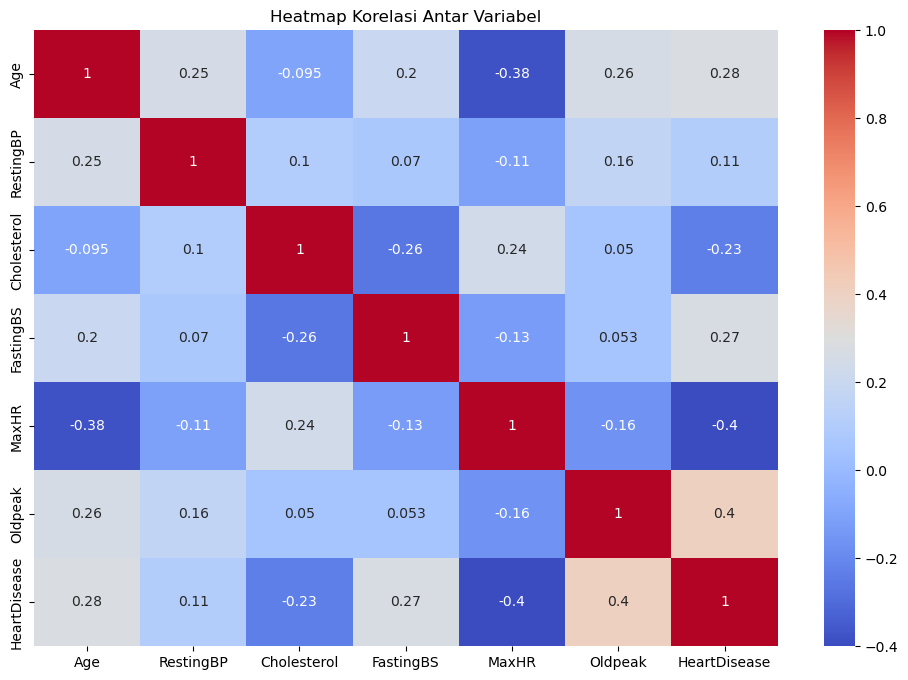

In [9]:
#analisis korelasi
corr_matrix = heart.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

In [22]:
#melihat outlier

Q1 = heart['Age'].quantile(0.25)
Q3 = heart['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = heart[(heart['Age'] < lower_bound) | (heart['Age'] > upper_bound)]
print("Jumlah outlier:", len(outliers))
print(outliers)

Jumlah outlier: 0
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease, cluster]
Index: []


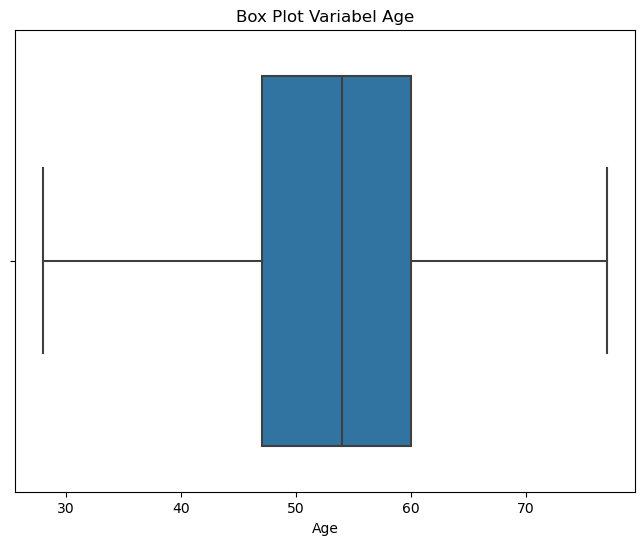

In [11]:
# Membuat box plot untuk variabel Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=heart['Age'])
plt.title('Box Plot Variabel Age')
plt.show()

In [12]:
#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
heart[numerical_features] = scaler.fit_transform(heart[numerical_features])
print(heart.head())

        Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0 -1.433140   M           ATA   0.410909     0.825070          0     Normal   
1 -0.478484   F           NAP   1.491752    -0.171961          0     Normal   
2 -1.751359   M           ATA  -0.129513     0.770188          0         ST   
3 -0.584556   F           ASY   0.302825     0.139040          0     Normal   
4  0.051881   M           NAP   0.951331    -0.034755          0     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  1.382928              N -0.832432       Up             0  
1  0.754157              N  0.105664     Flat             1  
2 -1.525138              N -0.832432       Up             0  
3 -1.132156              Y  0.574711     Flat             1  
4 -0.581981              N -0.832432       Up             0  


In [16]:
#classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = heart_encoded.drop('HeartDisease', axis=1)
y = heart_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8858695652173914


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7989130434782609

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8913043478260869

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [17]:
#machine learning
num_states = len(heart_encoded)
num_actions = 2 
Q = np.zeros((num_states, num_actions))

alpha = 0.1  
gamma = 0.6  
epsilon = 0.1  

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(Q[state, :])
#Algoritma Q-learning
num_episodes = 1000
for _ in range(num_episodes):
    state = np.random.randint(0, num_states)
    while state < num_states - 1:
        action = choose_action(state)
        next_state = state + 1
        reward = -1 if action == heart_encoded['HeartDisease'].iloc[state] else -5 
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

def predict(state):
    return np.argmax(Q[state, :])
state_10 = 9
prediction = predict(state_10)
print("Prediction for state 10:", prediction)

Prediction for state 10: 0


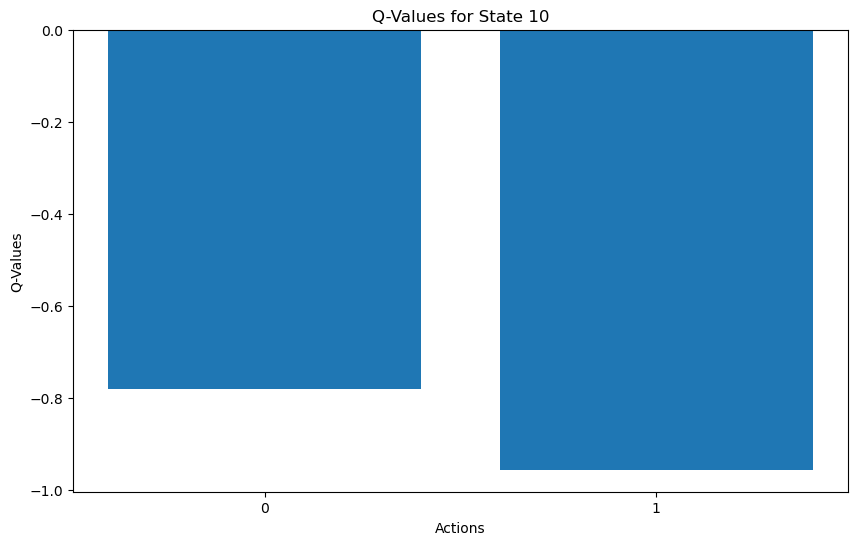

In [18]:
#visualisasi
state_to_visualize = 10

q_values = Q[state_to_visualize]

actions = np.arange(len(q_values))

plt.figure(figsize=(10, 6))
plt.bar(actions, q_values)
plt.xlabel('Actions')
plt.ylabel('Q-Values')
plt.title(f'Q-Values for State {state_to_visualize}')
plt.xticks(actions)
plt.show()